# Creating Rubik's cube dataset

There are 43 quintrilion different possible combinations of a rubik's cube. As we only need to solve one layer to create a mosaic, I hope we don't need that many. Each Rubik's cube will be a 2D matrix, in which each line will represent one side. All sides are fixed, where the middle cubie does not change position ever. All movements will consider the position of the Rubik's cube as the Western color sheme in the following way:

- FRONT = WHITE
- BACK = YELLOW
- UP = RED
- DOWN = ORANGE
- LEFT = BLUE
- RIGHT = GREEN

![Rubik's cube configuration](my_representation.png)

## 1. Creating initial cube representation

As said before, the cube will be a matrix 6 (number of sides) x 9 (number of cubes each side). The order of input should always be the same.

The order of the colors will be the number representing them, for example, 0 = white and 5 = green.

In [1]:
initial_cube = [
    [ 0 for i in range(9) ], # white
    [ 1 for i in range(9) ], # yellow
    [ 2 for i in range(9) ], # red
    [ 3 for i in range(9) ], # orange
    [ 4 for i in range(9) ], # blue
    [ 5 for i in range(9) ]  # green
]

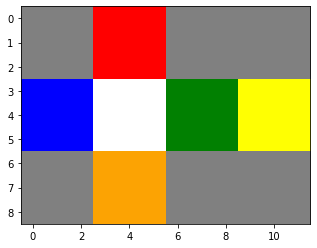

In [2]:
import matplotlib.pyplot as plt
import matplotlib

def create_cube_visualization(cube):
    # color 6 is gray
    full_matrix = [ [ 6 for i in range(12) ] for j in range(9) ]

    # white face 
    count = 0
    for i in range(3):
        for j in range(3):
            full_matrix[3+i][3+j] = cube[0][count]
            count+=1

    # yellow face 
    count = 0
    for i in range(3):
        for j in range(3):
            full_matrix[3+i][9+j] = cube[1][count]
            count+=1

    # red face 
    count = 0
    for i in range(3):
        for j in range(3):
            full_matrix[i][3+j] = cube[2][count]
            count+=1

    # orange face 
    count = 0
    for i in range(3):
        for j in range(3):
            full_matrix[6+i][3+j] = cube[3][count]
            count+=1

    # blue face 
    count = 0
    for i in range(3):
        for j in range(3):
            full_matrix[3+i][j] = cube[4][count]
            count+=1
    
    # green face 
    count = 0
    for i in range(3):
        for j in range(3):
            full_matrix[3+i][6+j] = cube[5][count]
            count+=1

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","yellow","red","orange","blue","green", "gray"])

    plt.imshow(full_matrix, cmap=cmap)

create_cube_visualization(initial_cube)

## 2. Creating the 12 cube movement functions

As there are only 6 sides, there are only 12 possible moviments, turning each side clockwise and counterclockwise.

Each of my functions will be <direction> or <direction>_<inverse> and receive a 6x9 matrix of numbers and return a matrix with the corresponding transformation.

As I am creating a representation that is an abstraction of the reality, I believe the best way to do these transformations is step by step.

All the results were checked using this [website](https://rubikscu.be/) and a real Rubik's cube.

![cube movements](https://blog.rubiks.com/wp-content/uploads/2018/08/how-to-solve-cube-formula.png)

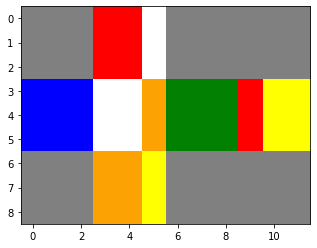

In [3]:
def right(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # red face (2) 2, 5, 8 receives white face (0) 2, 5, 8
    new_cube[2][2] = previous_cube[0][2]
    new_cube[2][5] = previous_cube[0][5]
    new_cube[2][8] = previous_cube[0][8]

    # yellow face (1) 6, 3, 0 receives red face (2) 2, 5, 8
    new_cube[1][6] = previous_cube[2][2]
    new_cube[1][3] = previous_cube[2][5]
    new_cube[1][0] = previous_cube[2][8]

    # orange face (3) 2, 5, 8 receives yellow face (1) 6, 3, 0
    new_cube[3][2] = previous_cube[1][6]
    new_cube[3][5] = previous_cube[1][3]
    new_cube[3][8] = previous_cube[1][0]

    # white face (0) 2, 5, 8 receives orange face (3) 2, 5, 8
    new_cube[0][2] = previous_cube[3][2]
    new_cube[0][5] = previous_cube[3][5]
    new_cube[0][8] = previous_cube[3][8]

    # turning the green face clockwise
    new_cube[5][0] = previous_cube[5][6]
    new_cube[5][1] = previous_cube[5][3]
    new_cube[5][2] = previous_cube[5][0]

    new_cube[5][2] = previous_cube[5][0]
    new_cube[5][5] = previous_cube[5][1]
    new_cube[5][8] = previous_cube[5][2]

    new_cube[5][8] = previous_cube[5][2]
    new_cube[5][7] = previous_cube[5][5]
    new_cube[5][6] = previous_cube[5][8]

    new_cube[5][6] = previous_cube[5][8]
    new_cube[5][3] = previous_cube[5][7]
    new_cube[5][0] = previous_cube[5][6]

    return new_cube

create_cube_visualization(right(initial_cube))

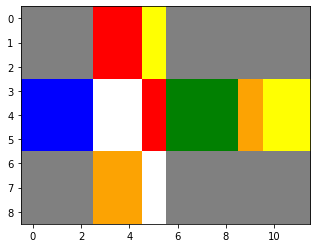

In [4]:
def right_inverse(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # red face (2) 2, 5, 8 receives yellow face (1) 0, 3, 6
    new_cube[2][2] = previous_cube[1][6]
    new_cube[2][5] = previous_cube[1][3]
    new_cube[2][8] = previous_cube[1][0]

    # yellow face (1) 6, 3, 0 receives orange face (3) 2, 5, 8
    new_cube[1][6] = previous_cube[3][2]
    new_cube[1][3] = previous_cube[3][5]
    new_cube[1][0] = previous_cube[3][8]

    # orange face (3) 2, 5, 8 receives white face (0) 2, 5, 8
    new_cube[3][2] = previous_cube[0][2]
    new_cube[3][5] = previous_cube[0][5]
    new_cube[3][8] = previous_cube[0][8]

    # white face (0) 2, 5, 8 receives red face (2) 2, 5, 8
    new_cube[0][2] = previous_cube[2][2]
    new_cube[0][5] = previous_cube[2][5]
    new_cube[0][8] = previous_cube[2][8]

    # turning the green face counter clockwise
    new_cube[5][0] = previous_cube[5][2]
    new_cube[5][1] = previous_cube[5][5]
    new_cube[5][2] = previous_cube[5][8]

    new_cube[5][2] = previous_cube[5][8]
    new_cube[5][5] = previous_cube[5][7]
    new_cube[5][8] = previous_cube[5][6]

    new_cube[5][6] = previous_cube[5][0]
    new_cube[5][7] = previous_cube[5][3]
    new_cube[5][8] = previous_cube[5][6]

    new_cube[5][0] = previous_cube[5][2]
    new_cube[5][3] = previous_cube[5][1]
    new_cube[5][6] = previous_cube[5][0]
    
    return new_cube

create_cube_visualization(right_inverse(initial_cube))

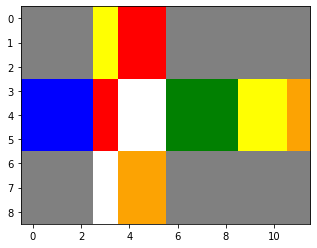

In [5]:
def left(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # red face (2) 0, 3, 6 receives yellow face (1) 8, 5, 2
    new_cube[2][0] = previous_cube[1][8]
    new_cube[2][3] = previous_cube[1][5]
    new_cube[2][6] = previous_cube[1][2]

    # yellow face (1) 2, 5, 8 receives orange face (3) 6, 3, 0
    new_cube[1][2] = previous_cube[3][6]
    new_cube[1][5] = previous_cube[3][3]
    new_cube[1][8] = previous_cube[3][0]

    # orange face (3) 0, 3, 6 receives white face (0) 0, 3, 6
    new_cube[3][0] = previous_cube[0][0]
    new_cube[3][3] = previous_cube[0][3]
    new_cube[3][6] = previous_cube[0][6]

    # white face (0) 0, 3, 6 receives red face (2) 0, 3, 6
    new_cube[0][0] = previous_cube[2][0]
    new_cube[0][3] = previous_cube[2][3]
    new_cube[0][6] = previous_cube[2][6]

    # turning the blue face clockwise
    new_cube[4][0] = previous_cube[4][6]
    new_cube[4][1] = previous_cube[4][3]
    new_cube[4][2] = previous_cube[4][0]

    new_cube[4][2] = previous_cube[4][0]
    new_cube[4][5] = previous_cube[4][1]
    new_cube[4][8] = previous_cube[4][2]

    new_cube[4][8] = previous_cube[4][2]
    new_cube[4][7] = previous_cube[4][5]
    new_cube[4][6] = previous_cube[4][8]

    new_cube[4][6] = previous_cube[4][8]
    new_cube[4][3] = previous_cube[4][7]
    new_cube[4][0] = previous_cube[4][6]
    
    return new_cube

create_cube_visualization(left(initial_cube))

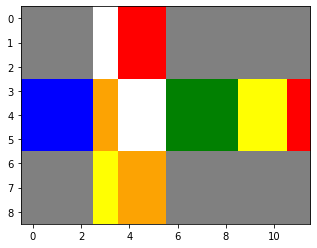

In [6]:
def left_inverse(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # red face (2) 0, 3, 6 receives white face (0) 0, 3, 6
    new_cube[2][0] = previous_cube[0][0]
    new_cube[2][3] = previous_cube[0][3]
    new_cube[2][6] = previous_cube[0][6]

    # yellow face (1) 2, 5, 8 receives red face (2) 6, 3, 0
    new_cube[1][2] = previous_cube[2][6]
    new_cube[1][5] = previous_cube[2][3]
    new_cube[1][8] = previous_cube[2][0]

    # orange face (3) 0, 3, 6 receives yellow face (1) 8, 5, 2
    new_cube[3][0] = previous_cube[1][8]
    new_cube[3][3] = previous_cube[1][5]
    new_cube[3][6] = previous_cube[1][2]

    # white face (0) 0, 3, 6 receives orange face (3) 0, 3, 6
    new_cube[0][0] = previous_cube[3][0]
    new_cube[0][3] = previous_cube[3][3]
    new_cube[0][6] = previous_cube[3][6]

    # turning the blue face counter clockwise
    new_cube[4][0] = previous_cube[4][2]
    new_cube[4][1] = previous_cube[4][5]
    new_cube[4][2] = previous_cube[4][8]

    new_cube[4][2] = previous_cube[4][8]
    new_cube[4][5] = previous_cube[4][7]
    new_cube[4][8] = previous_cube[4][6]

    new_cube[4][6] = previous_cube[4][0]
    new_cube[4][7] = previous_cube[4][3]
    new_cube[4][8] = previous_cube[4][6]

    new_cube[4][0] = previous_cube[4][2]
    new_cube[4][3] = previous_cube[4][1]
    new_cube[4][6] = previous_cube[4][0]
    
    return new_cube

create_cube_visualization(left_inverse(initial_cube))

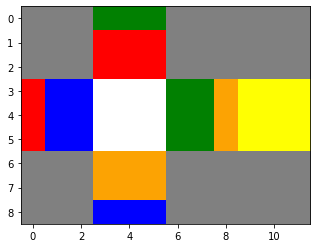

In [7]:
def back(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # red face (2) 0, 1, 2 receives green face (5) 2, 5, 8
    new_cube[2][0] = previous_cube[5][2]
    new_cube[2][1] = previous_cube[5][5]
    new_cube[2][2] = previous_cube[5][8]

    # blue face (4) 0, 3, 6 receives red face (2) 2, 1, 0
    new_cube[4][0] = previous_cube[2][2]
    new_cube[4][3] = previous_cube[2][1]
    new_cube[4][6] = previous_cube[2][0]

    # orange face (3) 6, 7, 8 receives blue face (4) 0, 3, 6
    new_cube[3][6] = previous_cube[4][0]
    new_cube[3][7] = previous_cube[4][3]
    new_cube[3][8] = previous_cube[4][6]

    # green face (5) 2, 5, 8 receives orange face (3) 8, 7, 6
    new_cube[5][2] = previous_cube[3][8]
    new_cube[5][5] = previous_cube[3][7]
    new_cube[5][8] = previous_cube[3][6]

    # turning the yellow face clockwise
    new_cube[1][0] = previous_cube[1][6]
    new_cube[1][1] = previous_cube[1][3]
    new_cube[1][2] = previous_cube[1][0]

    new_cube[1][2] = previous_cube[1][0]
    new_cube[1][5] = previous_cube[1][1]
    new_cube[1][8] = previous_cube[1][2]

    new_cube[1][8] = previous_cube[1][2]
    new_cube[1][7] = previous_cube[1][5]
    new_cube[1][6] = previous_cube[1][8]

    new_cube[1][6] = previous_cube[1][8]
    new_cube[1][3] = previous_cube[1][7]
    new_cube[1][0] = previous_cube[1][6]

    return new_cube

create_cube_visualization(back(initial_cube))

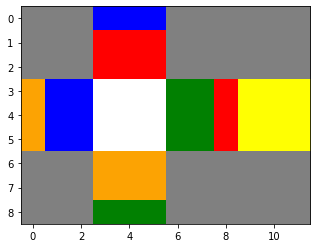

In [8]:
def back_inverse(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # red face (2) 0, 1, 2 receives blue face (4) 6, 3, 0
    new_cube[2][0] = previous_cube[4][6]
    new_cube[2][1] = previous_cube[4][3]
    new_cube[2][2] = previous_cube[4][0]

    # blue face (4) 0, 3, 6 receives orange face (3) 6, 7, 8
    new_cube[4][0] = previous_cube[3][6]
    new_cube[4][3] = previous_cube[3][7]
    new_cube[4][6] = previous_cube[3][8]

    # orange face (3) 6, 7, 8 receives green face (5) 8, 5, 2
    new_cube[3][6] = previous_cube[5][8]
    new_cube[3][7] = previous_cube[5][5]
    new_cube[3][8] = previous_cube[5][2]

    # green face (5) 2, 5, 8 receives red face (2) 0, 1, 2
    new_cube[5][2] = previous_cube[2][0]
    new_cube[5][5] = previous_cube[2][1]
    new_cube[5][8] = previous_cube[2][2]

    # turning the yellow face counter clockwise
    new_cube[1][0] = previous_cube[1][2]
    new_cube[1][1] = previous_cube[1][5]
    new_cube[1][2] = previous_cube[1][8]

    new_cube[1][2] = previous_cube[1][8]
    new_cube[1][5] = previous_cube[1][7]
    new_cube[1][8] = previous_cube[1][6]

    new_cube[1][6] = previous_cube[1][0]
    new_cube[1][7] = previous_cube[1][3]
    new_cube[1][8] = previous_cube[1][6]

    new_cube[1][0] = previous_cube[1][2]
    new_cube[1][3] = previous_cube[1][1]
    new_cube[1][6] = previous_cube[1][0]

    return new_cube

create_cube_visualization(back_inverse(initial_cube))

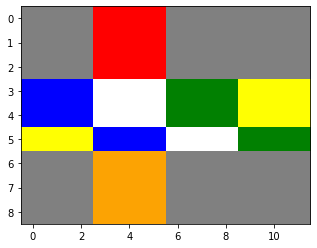

In [9]:
def down(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # blue face (4) 6, 7, 8 receives yellow face (1) 6, 7, 8
    new_cube[4][6] = previous_cube[1][6]
    new_cube[4][7] = previous_cube[1][7]
    new_cube[4][8] = previous_cube[1][8]

    # white face (0) 6, 7, 8 receives blue face (4) 6, 7, 8
    new_cube[0][6] = previous_cube[4][6]
    new_cube[0][7] = previous_cube[4][7]
    new_cube[0][8] = previous_cube[4][8]

    # green face (5) 6, 7, 8 receives white face (0) 6, 7, 8
    new_cube[5][6] = previous_cube[0][6]
    new_cube[5][7] = previous_cube[0][7]
    new_cube[5][8] = previous_cube[0][8]

    # yellow face (1) 6, 7, 8 receives green face (5) 6, 7, 8
    new_cube[1][6] = previous_cube[5][6]
    new_cube[1][7] = previous_cube[5][7]
    new_cube[1][8] = previous_cube[5][8]

    # turning the orange face clockwise
    new_cube[3][0] = previous_cube[3][6]
    new_cube[3][1] = previous_cube[3][3]
    new_cube[3][2] = previous_cube[3][0]

    new_cube[3][2] = previous_cube[3][0]
    new_cube[3][5] = previous_cube[3][1]
    new_cube[3][8] = previous_cube[3][2]

    new_cube[3][8] = previous_cube[3][2]
    new_cube[3][7] = previous_cube[3][5]
    new_cube[3][6] = previous_cube[3][8]

    new_cube[3][6] = previous_cube[3][8]
    new_cube[3][3] = previous_cube[3][7]
    new_cube[3][0] = previous_cube[3][6]

    return new_cube

create_cube_visualization(down(initial_cube))

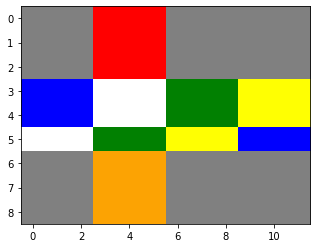

In [10]:
def down_inverse(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # blue face (4) 6, 7, 8 receives white face (0) 6, 7, 8
    new_cube[4][6] = previous_cube[0][6]
    new_cube[4][7] = previous_cube[0][7]
    new_cube[4][8] = previous_cube[0][8]

    # white face (0) 6, 7, 8 receives green face (5) 6, 7, 8
    new_cube[0][6] = previous_cube[5][6]
    new_cube[0][7] = previous_cube[5][7]
    new_cube[0][8] = previous_cube[5][8]

    # green face (5) 6, 7, 8 receives yellow face (1) 6, 7, 8
    new_cube[5][6] = previous_cube[1][6]
    new_cube[5][7] = previous_cube[1][7]
    new_cube[5][8] = previous_cube[1][8]

    # yellow face (1) 6, 7, 8 receives blue face (4) 6, 7, 8
    new_cube[1][6] = previous_cube[4][6]
    new_cube[1][7] = previous_cube[4][7]
    new_cube[1][8] = previous_cube[4][8]

    # turning the orange face counter clockwise
    new_cube[3][0] = previous_cube[3][2]
    new_cube[3][1] = previous_cube[3][5]
    new_cube[3][2] = previous_cube[3][8]

    new_cube[3][2] = previous_cube[3][8]
    new_cube[3][5] = previous_cube[3][7]
    new_cube[3][8] = previous_cube[3][6]

    new_cube[3][6] = previous_cube[3][0]
    new_cube[3][7] = previous_cube[3][3]
    new_cube[3][8] = previous_cube[3][6]

    new_cube[3][0] = previous_cube[3][2]
    new_cube[3][3] = previous_cube[3][1]
    new_cube[3][6] = previous_cube[3][0]

    return new_cube

create_cube_visualization(down_inverse(initial_cube))

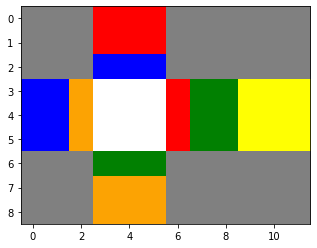

In [11]:
def front(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # red face (2) 6, 7, 8 receives blue face (4) 8, 5, 2
    new_cube[2][6] = previous_cube[4][8]
    new_cube[2][7] = previous_cube[4][5]
    new_cube[2][8] = previous_cube[4][2]

    # blue face (4) 2, 5, 8 receives orange face (3) 0, 1, 2
    new_cube[4][2] = previous_cube[3][0]
    new_cube[4][5] = previous_cube[3][1]
    new_cube[4][8] = previous_cube[3][2]

    # orange face (3) 0, 1, 2 receives green face (5) 6, 3, 0
    new_cube[3][0] = previous_cube[5][6]
    new_cube[3][1] = previous_cube[5][3]
    new_cube[3][2] = previous_cube[5][0]

    # green face (5) 0, 3, 6 receives red face (2) 6, 7, 8
    new_cube[5][0] = previous_cube[2][6]
    new_cube[5][3] = previous_cube[2][7]
    new_cube[5][6] = previous_cube[2][8]

    # turning the white face clockwise
    new_cube[0][0] = previous_cube[0][6]
    new_cube[0][1] = previous_cube[0][3]
    new_cube[0][2] = previous_cube[0][0]

    new_cube[0][2] = previous_cube[0][0]
    new_cube[0][5] = previous_cube[0][1]
    new_cube[0][8] = previous_cube[0][2]

    new_cube[0][8] = previous_cube[0][2]
    new_cube[0][7] = previous_cube[0][5]
    new_cube[0][6] = previous_cube[0][8]

    new_cube[0][6] = previous_cube[0][8]
    new_cube[0][3] = previous_cube[0][7]
    new_cube[0][0] = previous_cube[0][6]

    return new_cube

create_cube_visualization(front(initial_cube))

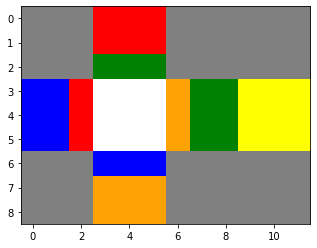

In [12]:
def front_inverse(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # red face (2) 6, 7, 8 receives green face (5) 0, 3, 6
    new_cube[2][6] = previous_cube[5][0]
    new_cube[2][7] = previous_cube[5][3]
    new_cube[2][8] = previous_cube[5][6]

    # blue face (4) 2, 5, 8 receives red face (2) 8, 7, 6
    new_cube[4][2] = previous_cube[2][8]
    new_cube[4][5] = previous_cube[2][7]
    new_cube[4][8] = previous_cube[2][6]

    # orange face (3) 0, 1, 2 receives blue face (4) 2, 5, 8
    new_cube[3][0] = previous_cube[4][2]
    new_cube[3][1] = previous_cube[4][5]
    new_cube[3][2] = previous_cube[4][8]

    # green face (5) 0, 3, 6 receives orange face (3) 2, 1, 0
    new_cube[5][0] = previous_cube[3][2]
    new_cube[5][3] = previous_cube[3][1]
    new_cube[5][6] = previous_cube[3][0]

    # turning the white face counter clockwise
    new_cube[0][0] = previous_cube[0][2]
    new_cube[0][1] = previous_cube[0][5]
    new_cube[0][2] = previous_cube[0][8]

    new_cube[0][2] = previous_cube[0][8]
    new_cube[0][5] = previous_cube[0][7]
    new_cube[0][8] = previous_cube[0][6]

    new_cube[0][6] = previous_cube[0][0]
    new_cube[0][7] = previous_cube[0][3]
    new_cube[0][8] = previous_cube[0][6]

    new_cube[0][0] = previous_cube[0][2]
    new_cube[0][3] = previous_cube[0][1]
    new_cube[0][6] = previous_cube[0][0]

    return new_cube

create_cube_visualization(front_inverse(initial_cube))

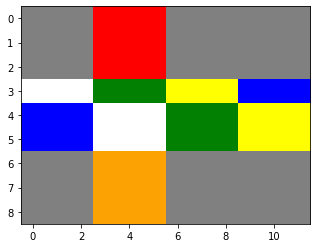

In [13]:
def up(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # blue face (4) 0, 1, 2 receives white face (0) 0, 1, 2
    new_cube[4][0] = previous_cube[0][0]
    new_cube[4][1] = previous_cube[0][1]
    new_cube[4][2] = previous_cube[0][2]

    # white face (0) 0, 1, 2 receives green face (5) 0, 1, 2
    new_cube[0][0] = previous_cube[5][0]
    new_cube[0][1] = previous_cube[5][1]
    new_cube[0][2] = previous_cube[5][2]

    # green face (5) 0, 1, 2 receives yellow face (1) 0, 1, 2
    new_cube[5][0] = previous_cube[1][0]
    new_cube[5][1] = previous_cube[1][1]
    new_cube[5][2] = previous_cube[1][2]

    # yellow face (1) 0, 1, 2 receives blue face (4) 0, 1, 2
    new_cube[1][0] = previous_cube[4][0]
    new_cube[1][1] = previous_cube[4][1]
    new_cube[1][2] = previous_cube[4][2]

    # turning the red face clockwise
    new_cube[2][0] = previous_cube[2][6]
    new_cube[2][1] = previous_cube[2][3]
    new_cube[2][2] = previous_cube[2][0]

    new_cube[2][2] = previous_cube[2][0]
    new_cube[2][5] = previous_cube[2][1]
    new_cube[2][8] = previous_cube[2][2]

    new_cube[2][8] = previous_cube[2][2]
    new_cube[2][7] = previous_cube[2][5]
    new_cube[2][6] = previous_cube[2][8]

    new_cube[2][6] = previous_cube[2][8]
    new_cube[2][3] = previous_cube[2][7]
    new_cube[2][0] = previous_cube[2][6]
    
    return new_cube

create_cube_visualization(up(initial_cube))

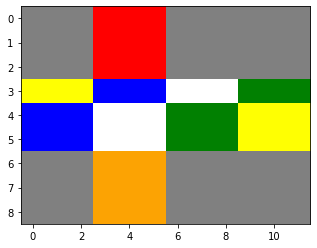

In [14]:
def up_inverse(cube):
    # creating blank rubiks cubes
    previous_cube = [ [0 for i in range(9)] for j in range(6) ]
    new_cube = [ [0 for i in range(9)] for j in range(6) ]

    for i in range(6):
        for j in range(9):
            previous_cube[i][j] = cube[i][j]
            new_cube[i][j] = cube[i][j]

    # blue face (4) 0, 1, 2 receives yellow face (1) 0, 1, 2
    new_cube[4][0] = previous_cube[1][0]
    new_cube[4][1] = previous_cube[1][1]
    new_cube[4][2] = previous_cube[1][2]

    # white face (0) 0, 1, 2 receives blue face (4) 0, 1, 2
    new_cube[0][0] = previous_cube[4][0]
    new_cube[0][1] = previous_cube[4][1]
    new_cube[0][2] = previous_cube[4][2]

    # green face (5) 0, 1, 2 receives white face (0) 0, 1, 2
    new_cube[5][0] = previous_cube[0][0]
    new_cube[5][1] = previous_cube[0][1]
    new_cube[5][2] = previous_cube[0][2]

    # yellow face (1) 0, 1, 2 receives green face (5) 0, 1, 2
    new_cube[1][0] = previous_cube[5][0]
    new_cube[1][1] = previous_cube[5][1]
    new_cube[1][2] = previous_cube[5][2]

    # turning the red face counter clockwise
    new_cube[2][0] = previous_cube[2][2]
    new_cube[2][1] = previous_cube[2][5]
    new_cube[2][2] = previous_cube[2][8]

    new_cube[2][2] = previous_cube[2][8]
    new_cube[2][5] = previous_cube[2][7]
    new_cube[2][8] = previous_cube[2][6]

    new_cube[2][6] = previous_cube[2][0]
    new_cube[2][7] = previous_cube[2][3]
    new_cube[2][8] = previous_cube[2][6]

    new_cube[2][0] = previous_cube[2][2]
    new_cube[2][3] = previous_cube[2][1]
    new_cube[2][6] = previous_cube[2][0]

    return new_cube

create_cube_visualization(up_inverse(initial_cube))

In [15]:
import random

# list with all moviment functions
move_func = [["right", right], ["right_inverse", right_inverse], ["left", left], ["left_inverse", left_inverse], 
            ["back", back], ["back_inverse", back_inverse], ["front", front], ["front_inverse", front_inverse], 
            ["down", down], ["down_inverse", down_inverse], ["up", up], ["up_inverse", up_inverse]]

print("First function before")
print(move_func[0][0])

random.shuffle(move_func)

print("First function after")
print(move_func[0][0])

First function before
right
First function after
right


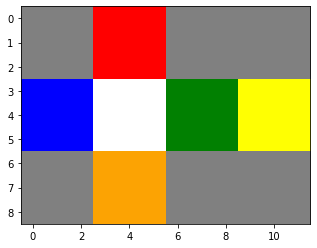

In [16]:
# creating brand new Rubik's cube
magic = [ [i for _ in range(9)] for i in range(6) ]

create_cube_visualization(magic)

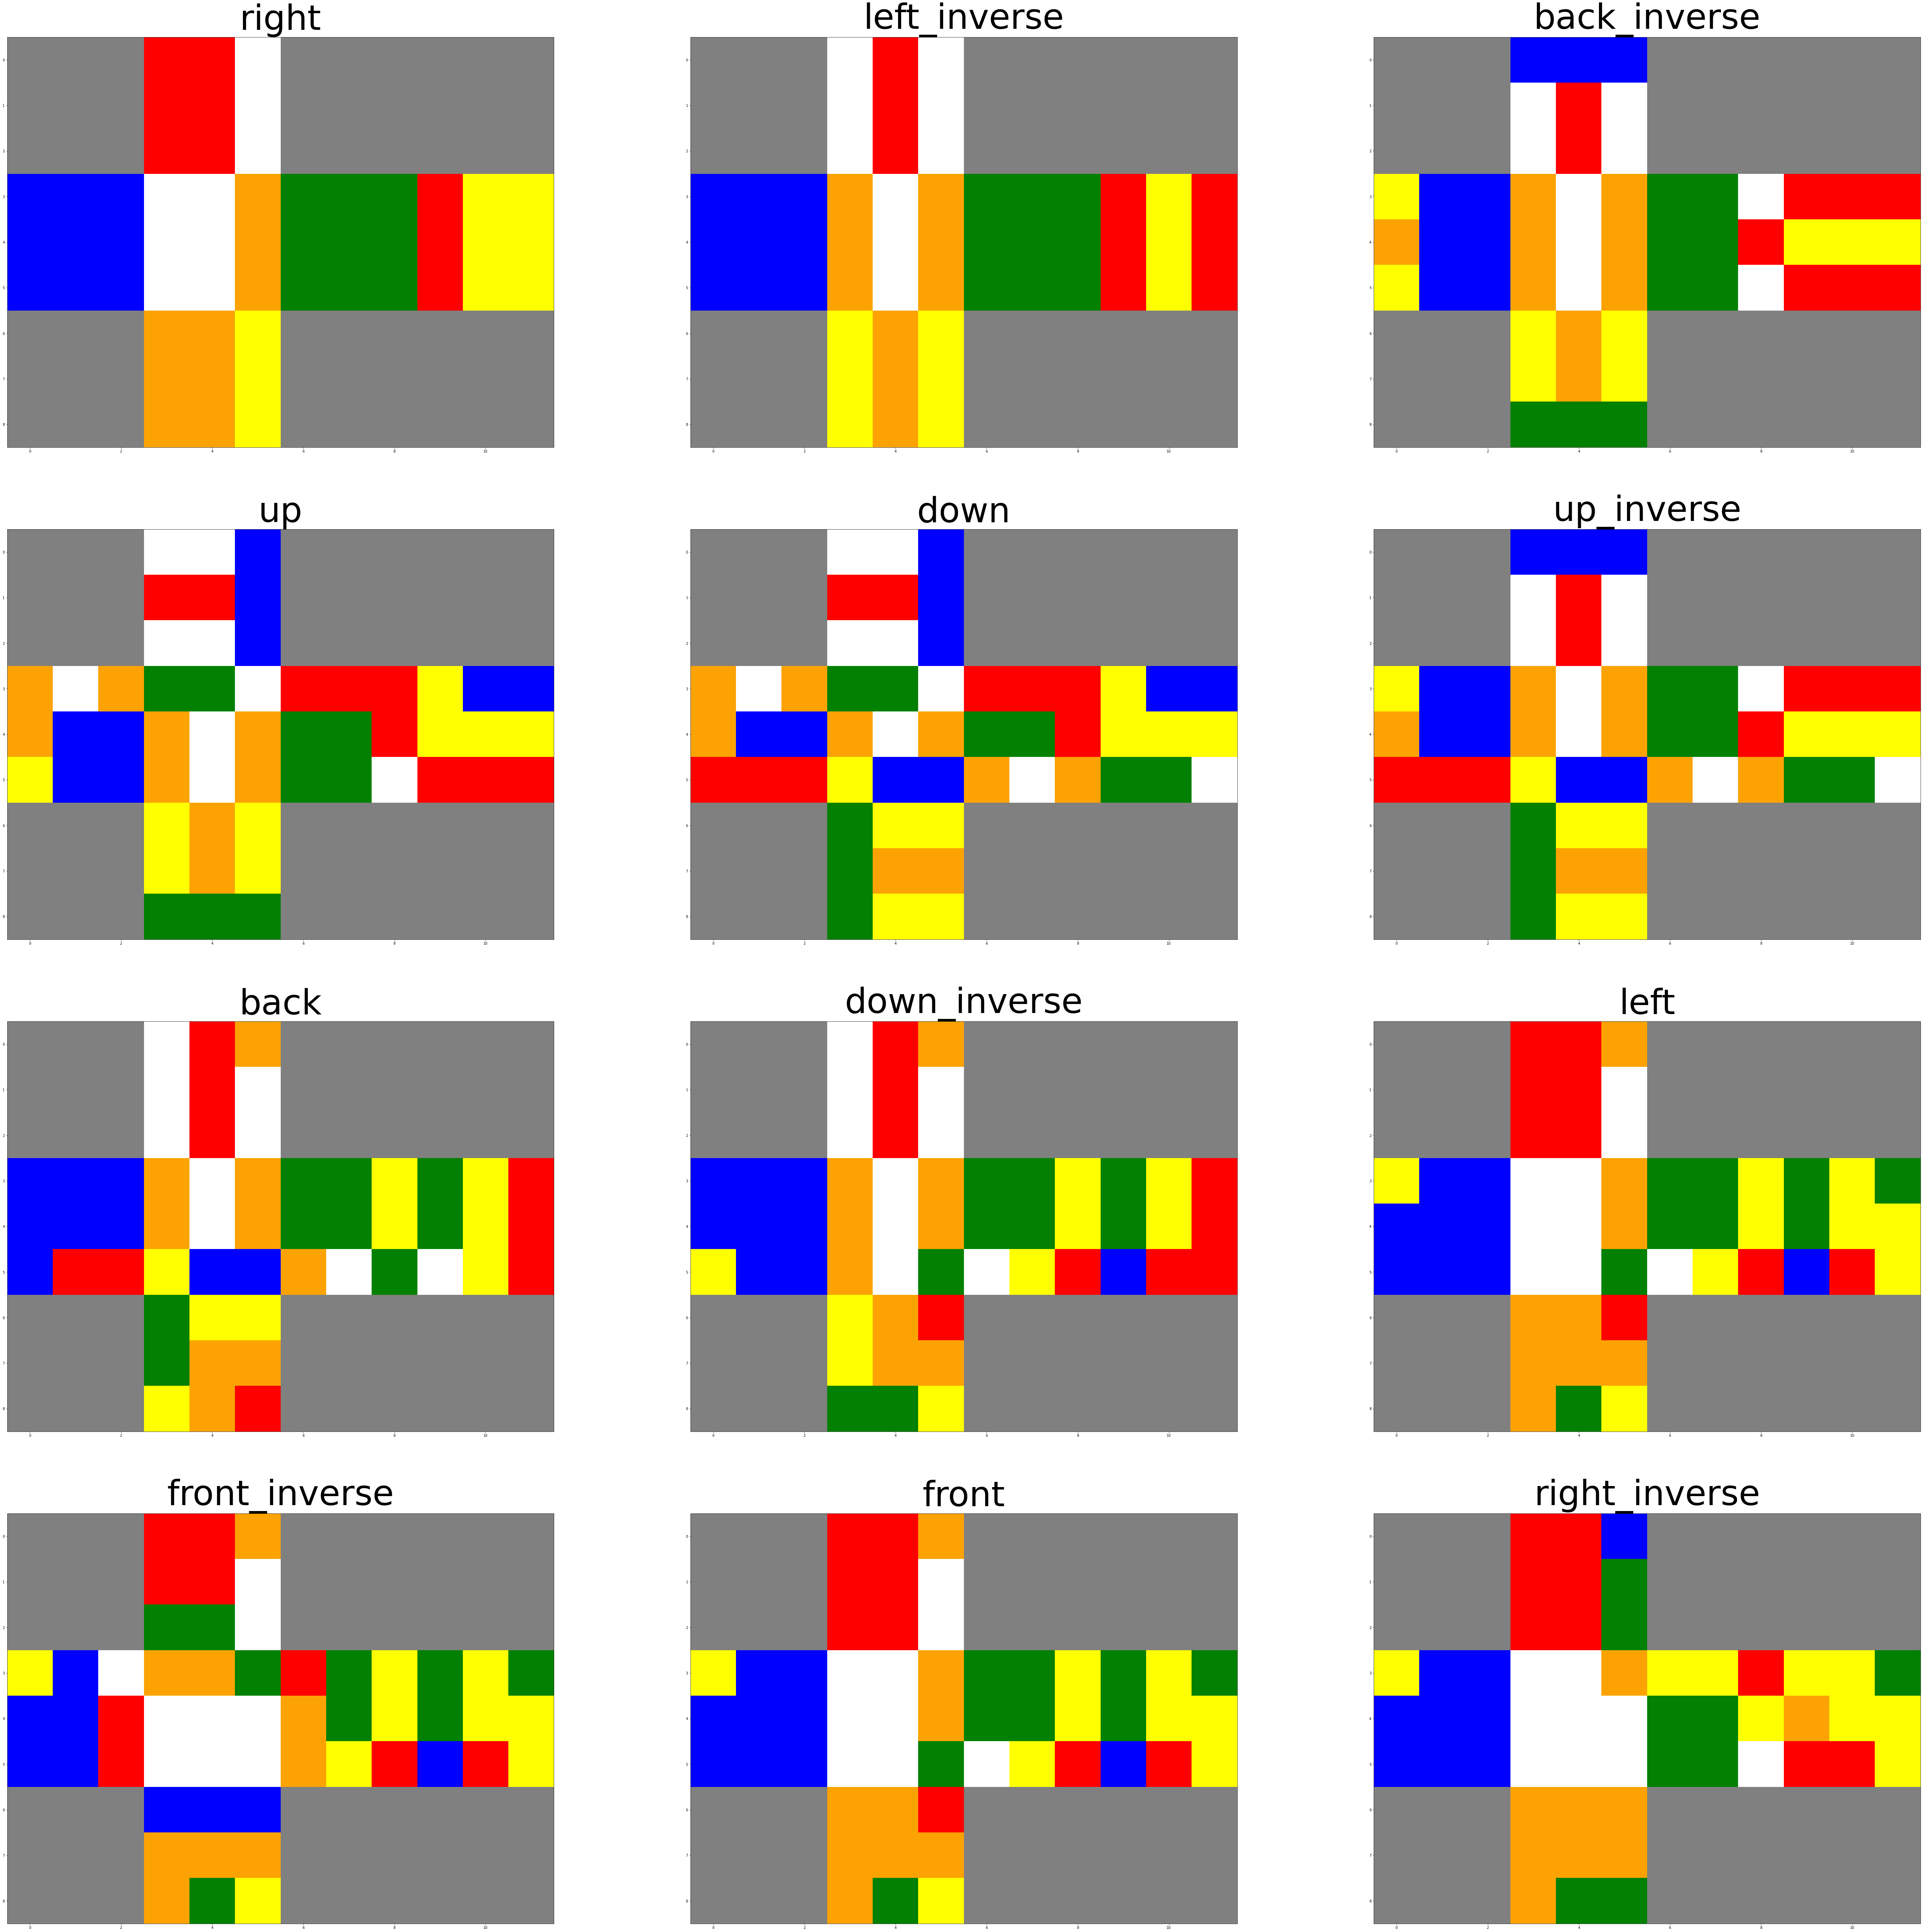

In [17]:
# creating a plot with the shuffled movements to see that it is working
plt.figure(figsize=(100,100))

for i in range(len(move_func)):
    plt.subplot(4, 3, i+1)
    magic = move_func[i][1](magic)
    create_cube_visualization(magic)
    plt.title(move_func[i][0], fontsize = 100)
    
plt.show()


## 3. Creating csv file with 6^9 different configurations

The dataset will consist of two values, the Rubik's cube (54 values) and the depth (amount of movements taken to get from the initial position to the scrambled).

I will perform maximum 9 steps (depth) and choose only 6 random movements on each step, resulting on around 10 million datapoints.

I will record the datapoints on the csv file instead of creating a dataframe first then csv, because of memory resourses issues.

I will not let the same datapoint be created twice. I will pop a shuffled list on each step.

In [18]:
# list with all moviment functions
move_func = [["right", right], ["right_inverse", right_inverse], ["left", left], ["left_inverse", left_inverse], 
            ["back", back], ["back_inverse", back_inverse], ["front", front], ["front_inverse", front_inverse], 
            ["down", down], ["down_inverse", down_inverse], ["up", up], ["up_inverse", up_inverse]]

In [19]:
# creating brand new Rubik's cube
cube_data = [ [i for _ in range(9)] for i in range(6) ]

In [20]:
import numpy as np
import pandas as pd

In [21]:
columns = [ 'cube_'+str(layer)+'_'+str(cubie) for layer in range(6) for cubie in range(9)]

columns.append("depth")

In [22]:
arr = np.array(cube_data).flatten()

# depth = 0
arr = np.append(arr, 0)

df = pd.DataFrame(arr.reshape(1, -1), columns = columns)

df.to_csv('cube_dataset.csv')

move_i = [ func for func in move_func]

random.shuffle(move_i)

# depth = 1
for i in range(6):
    new_cube_i = move_i.pop()[1](cube_data)

    arr = np.array(new_cube_i).flatten()
    arr = np.append(arr, 1)
    df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
    df.to_csv('cube_dataset.csv', mode='a', header=False)

    move_j = [ func for func in move_func]
    random.shuffle(move_j)

    # depth = 2
    for j in range(6):
        new_cube_j = move_j.pop()[1](new_cube_i)

        arr = np.array(new_cube_j).flatten()
        arr = np.append(arr, 2)
        df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
        df.to_csv('cube_dataset.csv', mode='a', header=False)

        move_k = [ func for func in move_func]
        random.shuffle(move_k)

        # depth = 3
        for k in range(6):
            new_cube_k = move_k.pop()[1](new_cube_j)
            
            arr = np.array(new_cube_k).flatten()
            arr = np.append(arr, 3) # change depth
            df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
            df.to_csv('cube_dataset.csv', mode='a', header=False)

            move_l = [ func for func in move_func]
            random.shuffle(move_l)

            print(((i+1)*(j+1)*(k+1))/216)

            # depth = 4
            for l in range(6):
                new_cube_l = move_l.pop()[1](new_cube_k)
                
                arr = np.array(new_cube_l).flatten()
                arr = np.append(arr, 4) # change depth
                df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
                df.to_csv('cube_dataset.csv', mode='a', header=False)

                move_m = [ func for func in move_func]
                random.shuffle(move_m)

                # depth = 5
                for m in range(6):
                    new_cube_m = move_m.pop()[1](new_cube_l)
                    
                    arr = np.array(new_cube_m).flatten()
                    arr = np.append(arr, 5) # change depth
                    df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
                    df.to_csv('cube_dataset.csv', mode='a', header=False)

                    move_n = [ func for func in move_func]
                    random.shuffle(move_n)

                    # depth = 6
                    for n in range(6):
                        new_cube_n = move_n.pop()[1](new_cube_m)
                        
                        arr = np.array(new_cube_n).flatten()
                        arr = np.append(arr, 6) # change depth
                        df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
                        df.to_csv('cube_dataset.csv', mode='a', header=False)

                        move_o = [ func for func in move_func]
                        random.shuffle(move_o)

                        # depth = 7
                        for o in range(6):
                            new_cube_o = move_o.pop()[1](new_cube_n)
                            
                            arr = np.array(new_cube_o).flatten()
                            arr = np.append(arr, 7) # change depth
                            df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
                            df.to_csv('cube_dataset.csv', mode='a', header=False)

                            move_p = [ func for func in move_func]
                            random.shuffle(move_p)

                            # depth = 8
                            for p in range(6):
                                new_cube_p = move_p.pop()[1](new_cube_o)
                                
                                arr = np.array(new_cube_p).flatten()
                                arr = np.append(arr, 8) # change depth
                                df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
                                df.to_csv('cube_dataset.csv', mode='a', header=False)

                                move_q = [ func for func in move_func]
                                random.shuffle(move_q)

                                # depth = 9
                                for q in range(6):
                                    new_cube_q = move_q.pop()[1](new_cube_p)
                                    
                                    arr = np.array(new_cube_q).flatten()
                                    arr = np.append(arr, 9) # change depth
                                    df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
                                    df.to_csv('cube_dataset.csv', mode='a', header=False) 

0.004629629629629629
0.009259259259259259
0.013888888888888888
0.018518518518518517
0.023148148148148147
0.027777777777777776
0.009259259259259259
0.018518518518518517
0.027777777777777776
0.037037037037037035
0.046296296296296294
0.05555555555555555
0.013888888888888888
0.027777777777777776
0.041666666666666664
0.05555555555555555
0.06944444444444445
0.08333333333333333
0.018518518518518517
0.037037037037037035
0.05555555555555555
0.07407407407407407
0.09259259259259259
0.1111111111111111
0.023148148148148147
0.046296296296296294
0.06944444444444445
0.09259259259259259
0.11574074074074074
0.1388888888888889
0.027777777777777776
0.05555555555555555
0.08333333333333333
0.1111111111111111
0.1388888888888889
0.16666666666666666
0.009259259259259259
0.018518518518518517
0.027777777777777776
0.037037037037037035
0.046296296296296294
0.05555555555555555
0.018518518518518517
0.037037037037037035
0.05555555555555555
0.07407407407407407
0.09259259259259259
0.1111111111111111
0.02777777777777777

PermissionError: [Errno 13] Permission denied: 'cube_dataset.csv'